In [1]:
filename = "https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status"

In [2]:
import pandas as pd
NYData=pd.read_csv(filename)

In [36]:
NYData.dtypes

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

In [ ]:
#from datetime import datetime

#NYData['created_date']=NYData['created_date'].dt.date 
#converts to date for date-based aggregation, if desired

In [47]:
NYSelect=NYData.loc[:,['created_date','complaint_type']]
NYSelect['complaint_type']=NYSelect['complaint_type'].str.upper()
NYGroups=NYSelect.groupby(['complaint_type'],as_index=False).count()

In [49]:
NYGroups.columns=['complaint_type','Count']

complaint_type    object
Count              int64
dtype: object

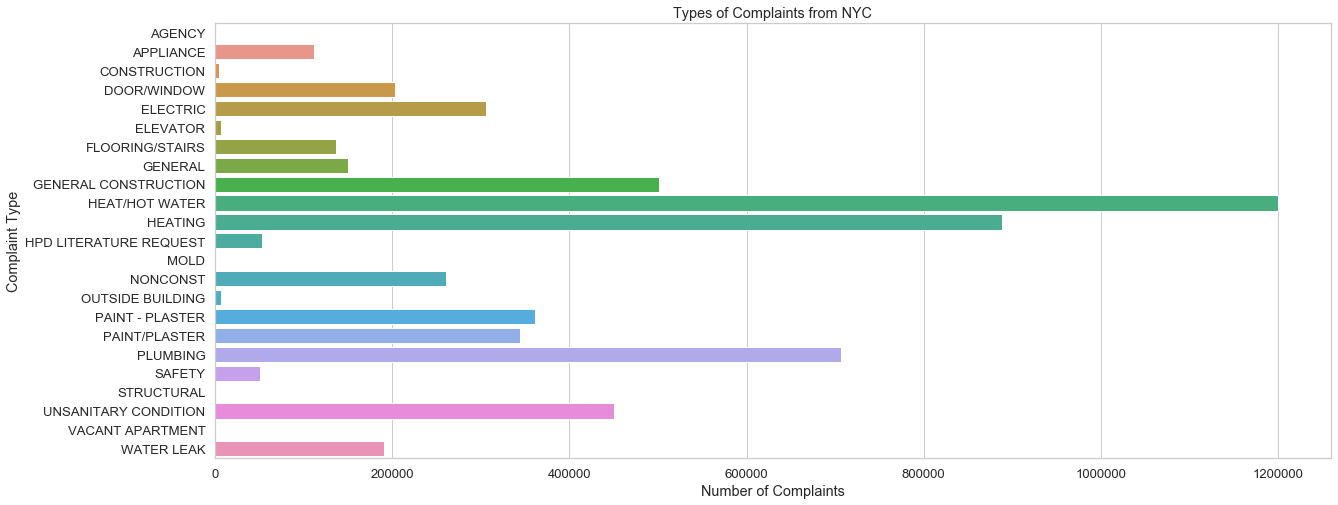

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set properties for bar plot
sns.set(context='notebook', style='whitegrid', font_scale=1.2)
fig, ax=plt.subplots(figsize=(20,8))

sns.barplot(x="Count",y="complaint_type",data=NYGroups,orient='h')

# Set plot title, labels and legend
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.title('Types of Complaints from NYC')
plt.show()